# PR-Disaster-Tweets: Analysis of Public Perception and Media Coverage During Natural Disasters in Puerto Rico

This notebook consolidates the entire repository code for the PR-Disaster-Tweets project. The repository includes analysis scripts for various datasets including HumAID, ISCRAM, a custom-scraped earthquake tweets dataset (January 2020), and advisory tweets (February 2025).

## Repository Structure
```
PR-Disaster-Tweets/
├── datasets/                  # All datasets used in the project
│   ├── HumAID_maria_tweets/   # HumAID dataset files for Hurricane Maria
│   ├── ISCRAM_maria_tweets/   # ISCRAM dataset files for Hurricane Maria
│   ├── PR_Earthquake_Tweets_Jan2020/ # Custom-scraped dataset for January 2020 earthquakes
│   └── PR_Advisory_Tweets_Feb_2025/  # Custom-scraped dataset for February 2025 tsunami advisory
├── .venv/                     # Virtual environment for dependencies
├── CITATION.md                # Citation information
├── LICENSE.md                 # License information
├── README.md                  # Project documentation
├── requirements.txt           # Python dependencies
```

## README.md

# PR-Disaster-Tweets: Analysis of Public Perception and Media Coverage During Natural Disasters in Puerto Rico

This project focuses on analyzing public perception and media coverage during natural disasters in Puerto Rico, with a particular emphasis on Hurricane Maria (2017), the 2020 earthquakes, and 2025 tsunami advisory events. The analysis combines multiple datasets, including HumAID, ISCRAM18, and custom-scraped datasets, to provide insights into disaster response patterns, public sentiment, and humanitarian needs.

### Dataset Details

- **HumAID_maria_tweets:** Contains annotated tweets for Hurricane Maria, including thematic categories.
- **ISCRAM_maria_tweets:** Includes hydrated tweet IDs and image URLs from Hurricane Maria.
- **PR_Earthquake_Tweets_Jan2020:** Custom-scraped tweets for January 2020 earthquakes.
- **PR_Advisory_Tweets_Feb_2025:** Custom-scraped tweets for the February 2025 tsunami advisory.

### Running the Analysis

1. Clone the repository and install dependencies (see instructions in the README).
2. Each analysis script (in the `datasets/<dataset>/analysis/` folder) can be run separately. This notebook combines them for a unified view.

## CITATION.md

### Citation Information

#### HumAID Dataset
```bibtex
@inproceedings{humaid2020,
    Author = {Firoj Alam, Umair Qazi, Muhammad Imran, Ferda Ofli},
    Booktitle = {15th International Conference on Web and Social Media (ICWSM)},
    Keywords = {Social Media, Crisis Computing, Tweet Text Classification, Disaster Response},
    Title = {HumAID: Human-Annotated Disaster Incidents Data from Twitter},
    Year = {2021}
}
```

#### ISCRAM Dataset
```bibtex
@article{firoj2018twitter,
    title={A Twitter Tale of Three Hurricanes: Harvey, Irma, and Maria},
    author={Alam, Firoj and Ofli, Ferda and Imran, Muhammad and Aupetit, Michael},
    journal={Proc. of ISCRAM, Rochester, USA},
    year={2018}
}
```

#### Project Citation
```bibtex
@misc{humaid_project,
    Author = {Your Name and Collaborators},
    Title = {HumAID: Analysis of Public Perception and Media Coverage During Natural Disasters in Puerto Rico},
    Year = {2024},
    Publisher = {GitHub},
    Journal = {GitHub repository},
    Howpublished = {\url{https://github.com/yourusername/HumAID}}
}
```

#### Additional References
- HumAID Dataset: [Link](https://crisisnlp.qcri.org/humaid_dataset)
- ISCRAM18 Dataset: [Link](https://arxiv.org/pdf/1805.05144)

## Analysis of HumAID Hurricane María Tweets

The following cell includes the code originally found in `datasets/HumAID_maria_tweets/analysis/analyze_humaid.py`.

<>:90: SyntaxWarning: invalid escape sequence '\H'
<>:90: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Marco\AppData\Local\Temp\ipykernel_28036\906284674.py:90: SyntaxWarning: invalid escape sequence '\H'
  filepath = "datasets\HumAID_maria_tweets\HumAID_maria_tweets.csv"


Data loaded successfully.
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     7278 non-null   int64 
 1   tweet_text   7278 non-null   object
 2   class_label  7278 non-null   object
 3   split        7278 non-null   object
dtypes: int64(1), object(3)
memory usage: 227.6+ KB
None
             tweet_id                                         tweet_text  \
0  914134332226330625  San Juan: Trump lashes out with good reason. #...   
1  910783670134476800  Hurricane Maria Live Updates: Catastrophic Flo...   
2  912134938727780355  Getting food to the island is, obviously, crit...   
3  910669838842056704  My heart breaks for the families in Puerto Ric...   
4  912287091026997248  #B-FAST sending medical, reconstruction &amp; ...   

                              class_label  split  
0              other_relevant_inform

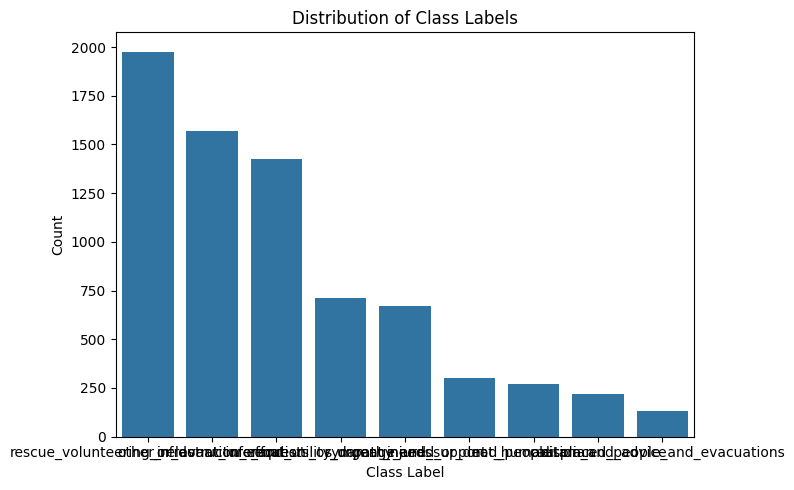

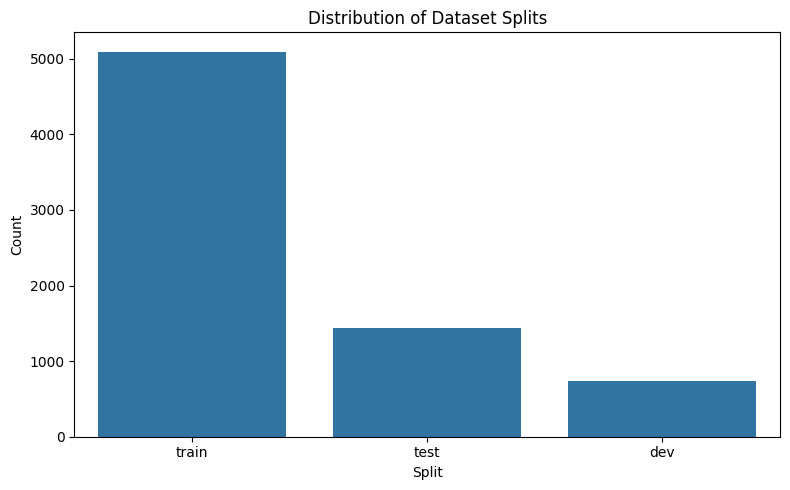

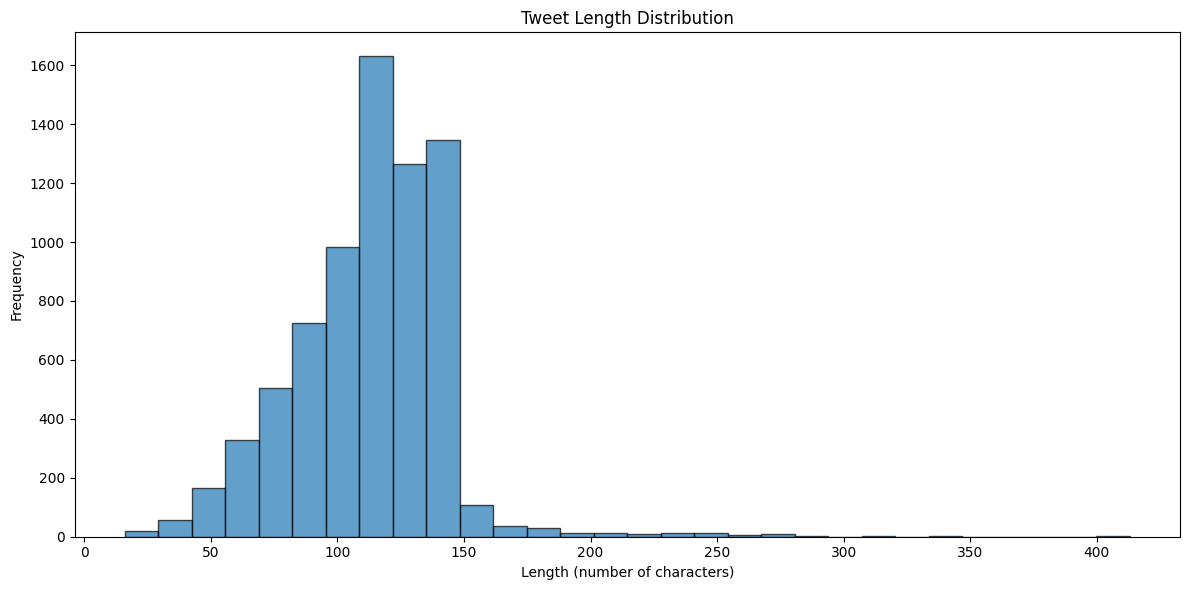

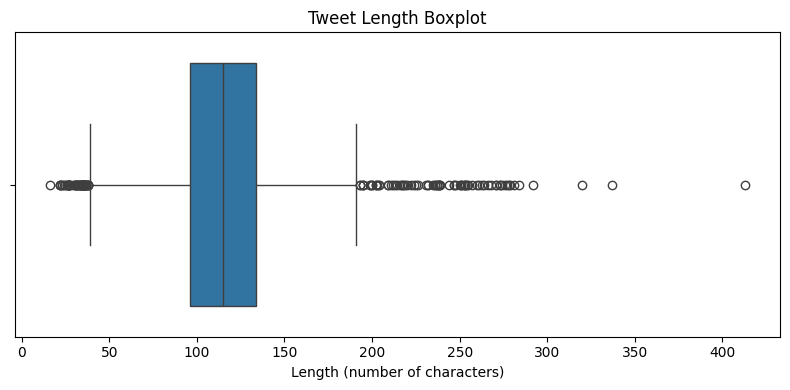

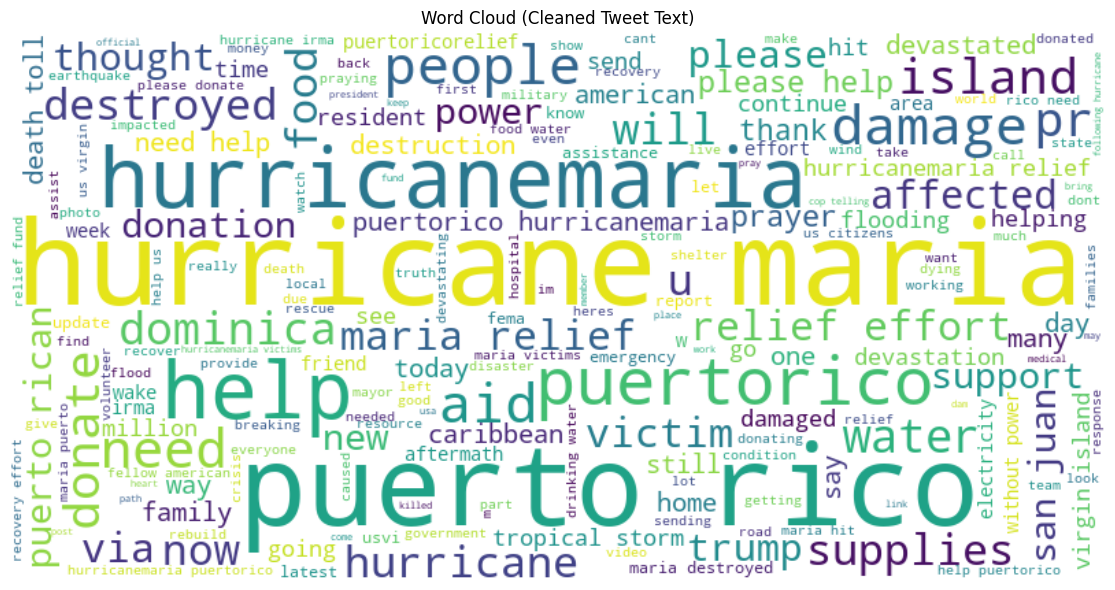

In [1]:
# File: datasets/HumAID_maria_tweets/analysis/analyze_humaid.py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return df
    except Exception as e:
        print(f"Error loading the file: {e}")
        return None

def preprocess_data(df):
    if 'tweet_text' in df.columns:
        df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
    else:
        print("Column 'tweet_text' not found for calculating tweet length.")
    return df

def plot_class_distribution(df):
    if 'class_label' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='class_label', order=df['class_label'].value_counts().index)
        plt.title("Distribution of Class Labels")
        plt.xlabel("Class Label")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'class_label' not found for class distribution.")

def plot_split_distribution(df):
    if 'split' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='split', order=df['split'].value_counts().index)
        plt.title("Distribution of Dataset Splits")
        plt.xlabel("Split")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'split' not found for split distribution.")

def plot_tweet_length_distribution(df):
    if 'tweet_length' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['tweet_length'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Tweet Length Distribution")
        plt.xlabel("Length (number of characters)")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df['tweet_length'])
        plt.title("Tweet Length Boxplot")
        plt.xlabel("Length (number of characters)")
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'tweet_length' is not available for length analysis.")

def generate_word_cloud(df):
    if 'tweet_text' not in df.columns:
        print("Column 'tweet_text' not found for generating word cloud.")
        return
    all_text = " ".join(df['tweet_text'].dropna().astype(str))
    cleaned_text = re.sub(r'https?://\S+', '', all_text)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    cleaned_text = re.sub(r'\bRT\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()
    custom_stopwords = {"https", "http", "co", "amp", "rt"}
    all_stopwords = STOPWORDS.union(custom_stopwords)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=all_stopwords).generate(cleaned_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud (Cleaned Tweet Text)")
    plt.tight_layout()
    plt.show()

def main():
    filepath = "datasets\HumAID_maria_tweets\HumAID_maria_tweets.csv"
    if not os.path.exists(filepath):
        print(f"The file '{filepath}' does not exist. Check the path.")
        return
    df = load_data(filepath)
    if df is None:
        return
    print("Dataset Information:")
    print(df.info())
    print(df.head())
    df = preprocess_data(df)
    plot_class_distribution(df)
    plot_split_distribution(df)
    plot_tweet_length_distribution(df)
    generate_word_cloud(df)

if __name__ == "__main__":
    main()

## Maria Analysis Report

Below is the content from the `maria_analysis.md` file summarizing the Hurricane Maria tweet analysis.

```markdown
# Hurricane Maria Tweet Analysis

## Overview
Total tweets analyzed: 7278

## Data Split Distribution
| Split | Number of Tweets | Percentage |
|-------|-----------------|------------|
| train | 5094 | 70.0% |
| dev | 742 | 10.2% |
| test | 1442 | 19.8% |

## Label Distribution
| Label | Count | Percentage |
|-------|-------|------------|
| rescue_volunteering_or_donation_effort | 1977 | 27.2% |
| other_relevant_information | 1568 | 21.5% |
| infrastructure_and_utility_damage | 1427 | 19.6% |
| requests_or_urgent_needs | 711 | 9.8% |
| sympathy_and_support | 672 | 9.2% |
| injured_or_dead_people | 302 | 4.1% |
| not_humanitarian | 270 | 3.7% |
| caution_and_advice | 220 | 3.0% |
| displaced_people_and_evacuations | 131 | 1.8% |

## Visualizations
### Split Distribution
![Split Distribution](maria_splits_distribution.png)

### Label Distribution
![Label Distribution](maria_label_distribution.png)

## Key Findings
### Most Common Tweet Categories:
- rescue_volunteering_or_donation_effort: 1977 tweets (27.2%)
- other_relevant_information: 1568 tweets (21.5%)
- infrastructure_and_utility_damage: 1427 tweets (19.6%)

### Infrastructure and Urgent Needs:
- Infrastructure damage related tweets: 1427
- Urgent needs related tweets: 711
- Combined: 2138 tweets (29.4% of total)
```

## Analysis of ISCRAM Hurricane Maria Tweets

The next section contains the code from `datasets/ISCRAM_maria_tweets/analysis/analyze_ISCRAM_tweets.py`.

Datos cargados exitosamente.
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             959 non-null    int64 
 1   text           959 non-null    object
 2   created_at     959 non-null    object
 3   like_count     959 non-null    int64 
 4   retweet_count  959 non-null    int64 
 5   lang           959 non-null    object
 6   username       959 non-null    object
dtypes: int64(3), object(4)
memory usage: 52.6+ KB
None
                   id                                               text  \
0  914278688144883713  RT @joebereta: Hey @realDonaldTrump you're a r...   
1  914278695657000960  RT @Newsweek: Meet Carmen Yulín Cruz, the woma...   
2  914278688144883713  RT @joebereta: Hey @realDonaldTrump you're a r...   
3  914278695657000960  RT @Newsweek: Meet Carmen Yulín Cruz, the woma...   
4  9142786987691745

<>:113: SyntaxWarning: invalid escape sequence '\I'
<>:113: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Marco\AppData\Local\Temp\ipykernel_28036\4144205790.py:113: SyntaxWarning: invalid escape sequence '\I'
  filepath = "datasets\ISCRAM_maria_tweets\ISCRAM_maria_tweets.csv"


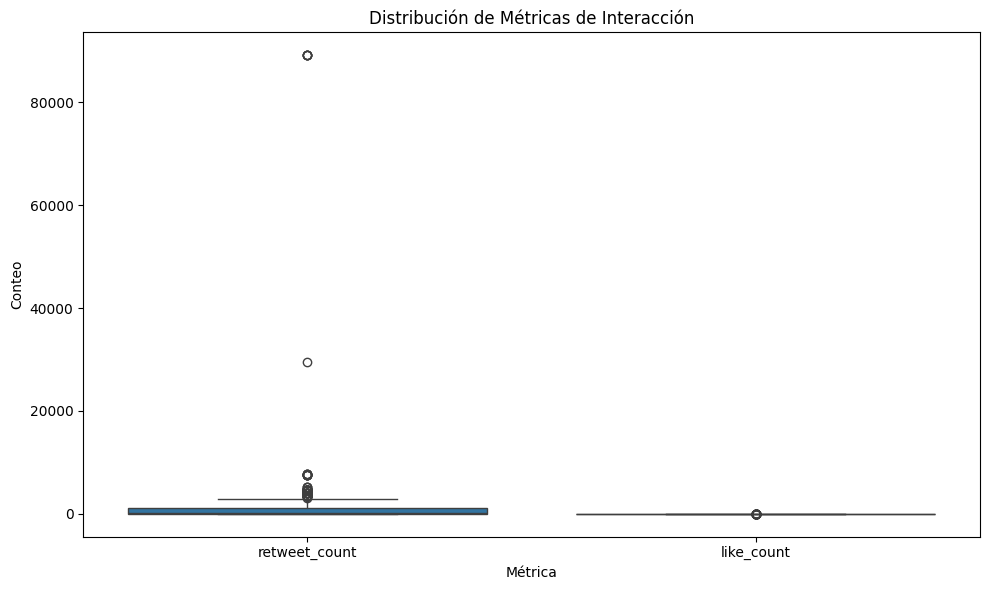

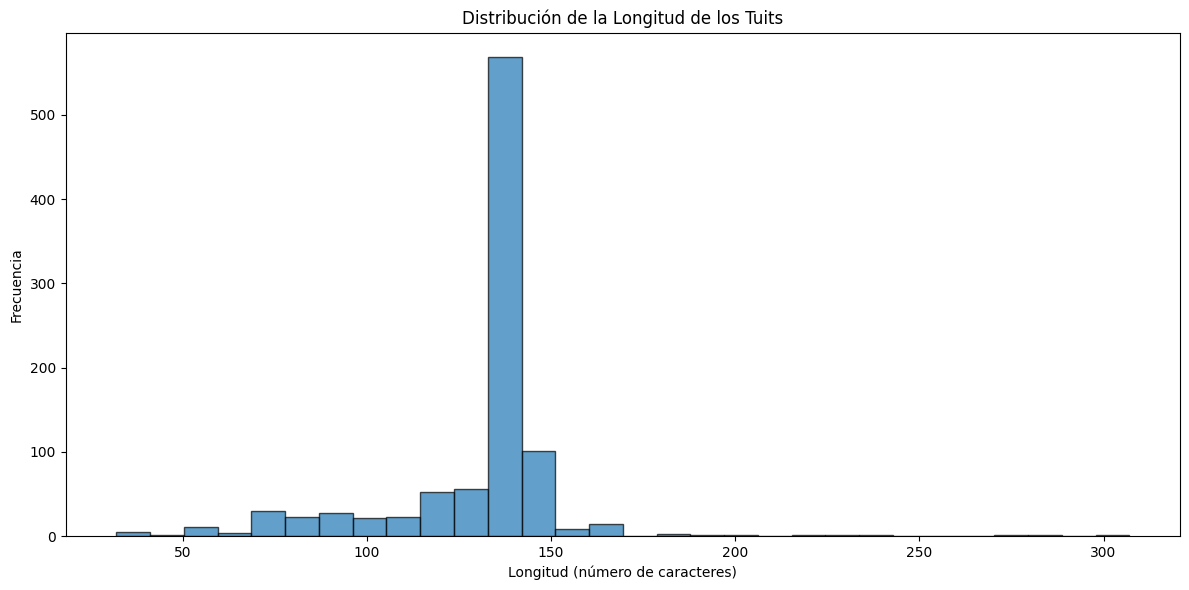

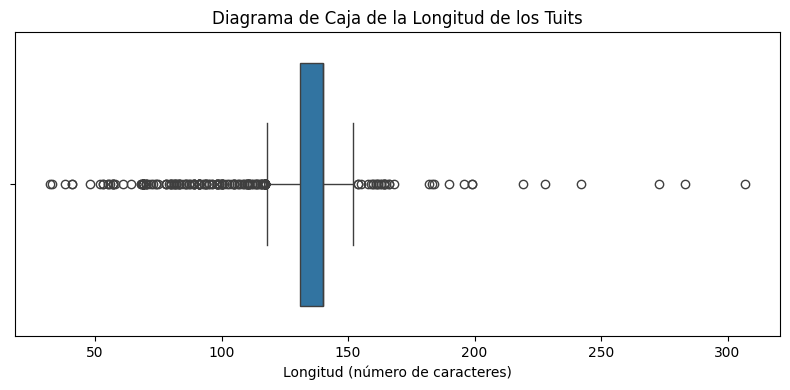

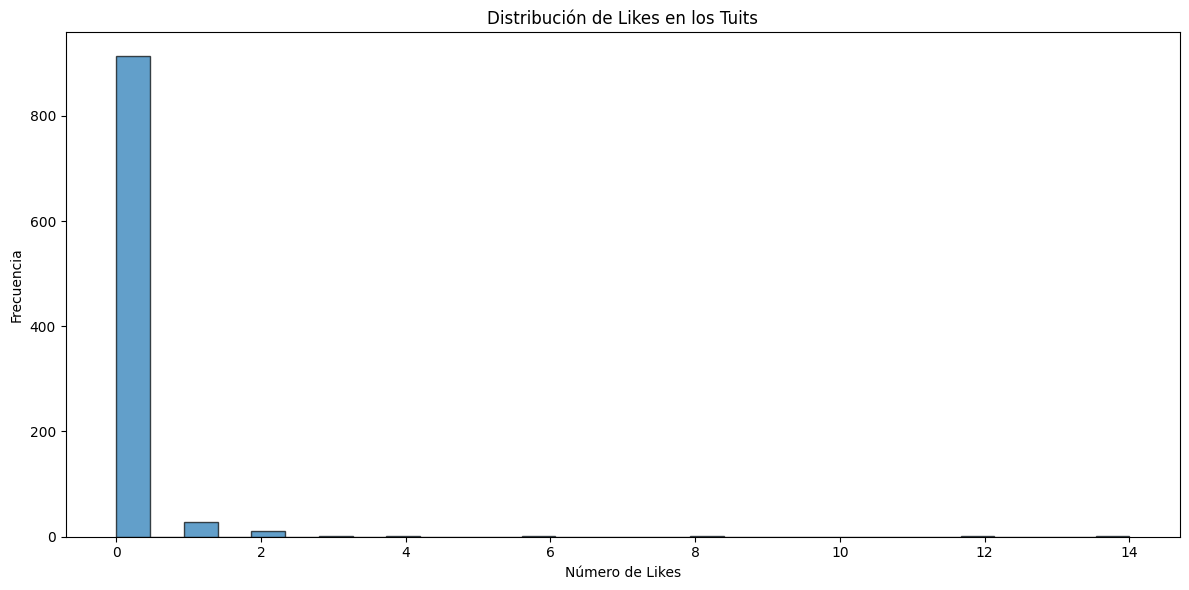

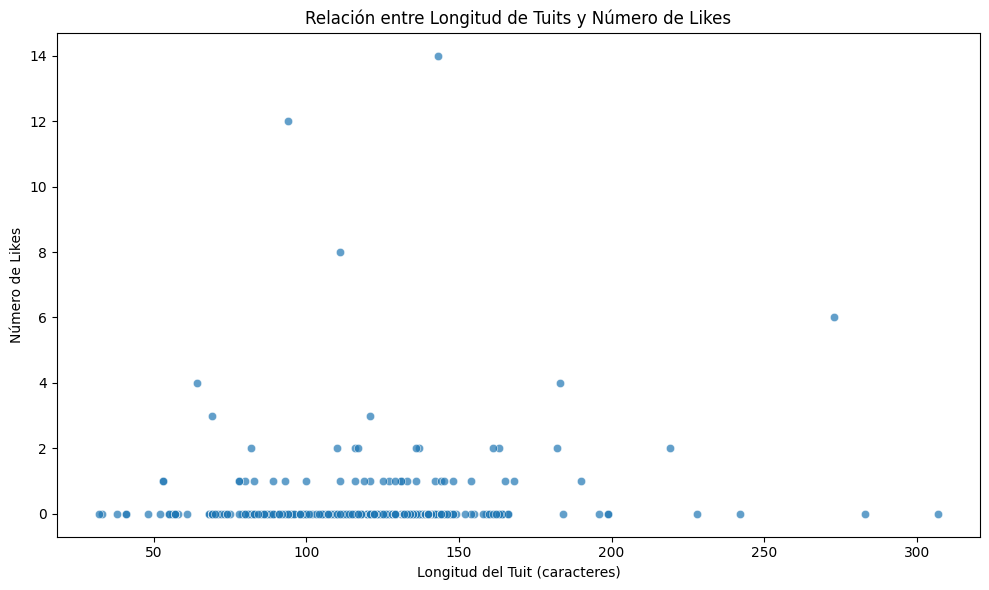

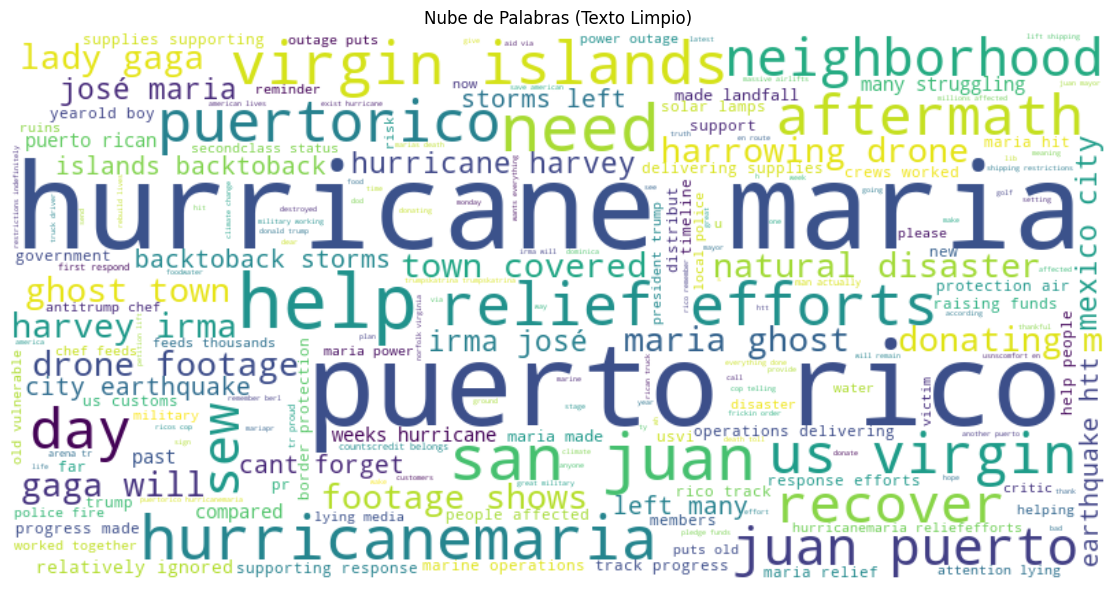

In [2]:
# File: datasets/ISCRAM_maria_tweets/analysis/analyze_ISCRAM_tweets.py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Datos cargados exitosamente.")
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

def preprocess_data(df):
    if 'created_at' in df.columns:
        try:
            df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y', errors='coerce')
            print("Columna 'created_at' convertida a datetime.")
        except Exception as e:
            print(f"Error al convertir 'created_at': {e}")
    else:
        print("No se encontró la columna 'created_at'.")
    if 'text' in df.columns:
        df['tweet_length'] = df['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
    else:
        print("No se encontró la columna 'text' para calcular la longitud de los tuits.")
    return df

def plot_engagement_metrics(df):
    engagement_cols = []
    for col in ['retweet_count', 'like_count']:
        if col in df.columns:
            engagement_cols.append(col)
    if engagement_cols:
        df_engagement = df[engagement_cols].melt(var_name="Métrica", value_name="Conteo")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Métrica", y="Conteo", data=df_engagement)
        plt.title("Distribución de Métricas de Interacción")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron columnas de métricas de interacción (retweet_count, like_count).")

def plot_tweet_length_distribution(df):
    if 'tweet_length' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['tweet_length'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df['tweet_length'])
        plt.title("Diagrama de Caja de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'tweet_length' no está disponible para el análisis de longitud.")

def plot_likes_distribution(df):
    if 'like_count' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['like_count'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de Likes en los Tuits")
        plt.xlabel("Número de Likes")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'like_count' no está disponible para analizar la distribución de likes.")

def plot_length_vs_likes(df):
    if 'tweet_length' in df.columns and 'like_count' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='tweet_length', y='like_count', data=df, alpha=0.7)
        plt.title("Relación entre Longitud de Tuits y Número de Likes")
        plt.xlabel("Longitud del Tuit (caracteres)")
        plt.ylabel("Número de Likes")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron las columnas necesarias ('tweet_length', 'like_count') para este análisis.")

def generate_word_cloud(df):
    if 'text' not in df.columns:
        print("La columna 'text' no se encontró para generar la nube de palabras.")
        return
    all_text = " ".join(df['text'].dropna().astype(str))
    cleaned_text = re.sub(r'https?://\S+', '', all_text)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    cleaned_text = re.sub(r'\bRT\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^A-Za-záéíóúñüÁÉÍÓÚÑÜ\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()
    custom_stopwords = {"https", "http", "co", "amp"}
    stopwords = STOPWORDS.union(custom_stopwords)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords).generate(cleaned_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras (Texto Limpio)")
    plt.tight_layout()
    plt.show()

def main():
    filepath = "datasets\ISCRAM_maria_tweets\ISCRAM_maria_tweets.csv"
    if not os.path.exists(filepath):
        print(f"El archivo '{filepath}' no existe. Verifica la ruta.")
        return
    df = load_data(filepath)
    if df is None:
        return
    print("Información del dataset:")
    print(df.info())
    print(df.head())
    df = preprocess_data(df)
    plot_engagement_metrics(df)
    plot_tweet_length_distribution(df)
    plot_likes_distribution(df)
    plot_length_vs_likes(df)
    generate_word_cloud(df)

if __name__ == "__main__":
    main()

## Analysis of Advisory Tweets (Feb 2025)

The following cell contains the code from `datasets/PR_Advisory_Tweets_Feb_2025/analysis/analyze_Feb2025_tweets.py`.

Datos cargados exitosamente.
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Query_Str               229 non-null    object 
 1   Post_URL                229 non-null    object 
 2   Author_Name             228 non-null    object 
 3   Author_Web_Page_URL     229 non-null    object 
 4   Author_Handle           228 non-null    object 
 5   Verified_Status         228 non-null    object 
 6   UTC_Time                228 non-null    object 
 7   Ads                     229 non-null    bool   
 8   Tweet_Content           228 non-null    object 
 9   Post_ID                 228 non-null    float64
 10  Tweet_URL               228 non-null    object 
 11  Reply_Count             228 non-null    float64
 12  Repost_Count            229 non-null    int64  
 13  Like_Count              229 non-null    i

<>:134: SyntaxWarning: invalid escape sequence '\P'
<>:134: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Marco\AppData\Local\Temp\ipykernel_28036\3666516517.py:134: SyntaxWarning: invalid escape sequence '\P'
  filepath = "datasets\PR_Advisory_Tweets_Feb_2025\PR_Advisory_Tweets_Feb_2025.csv"


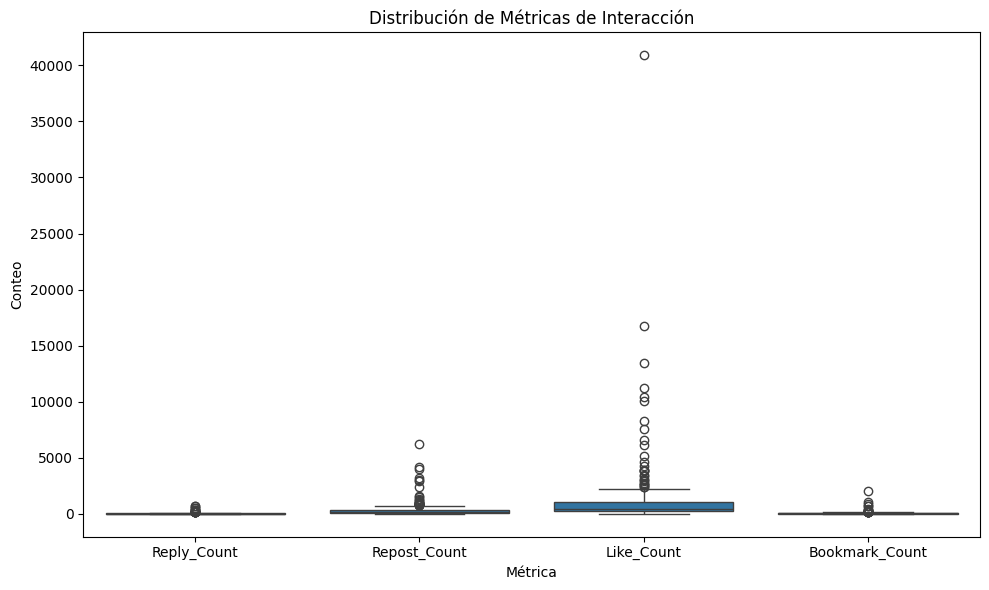

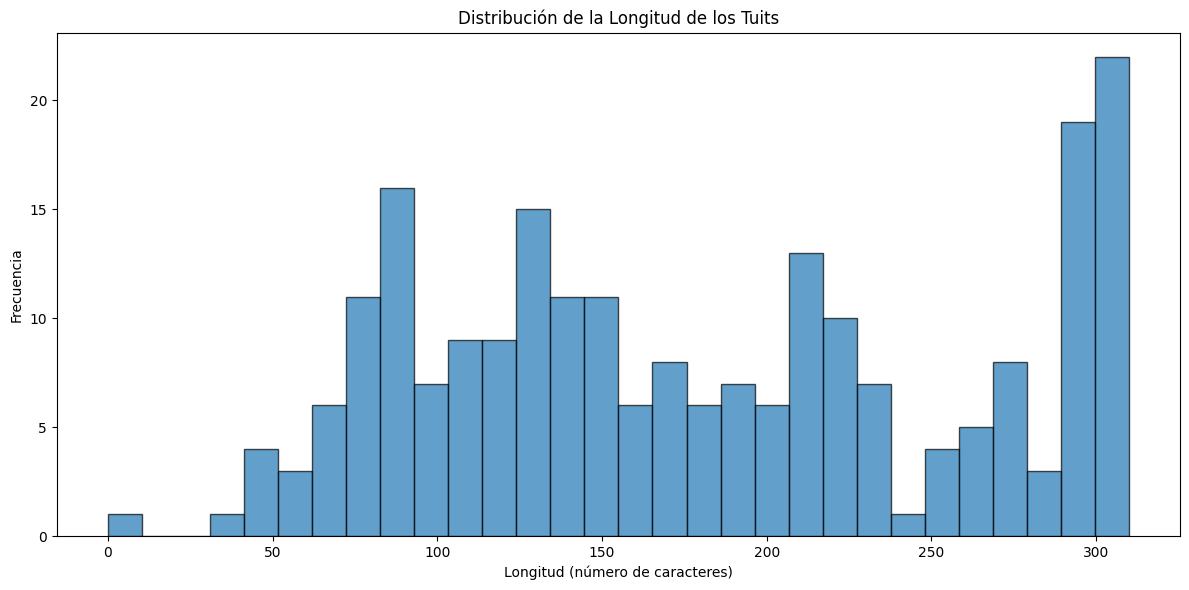

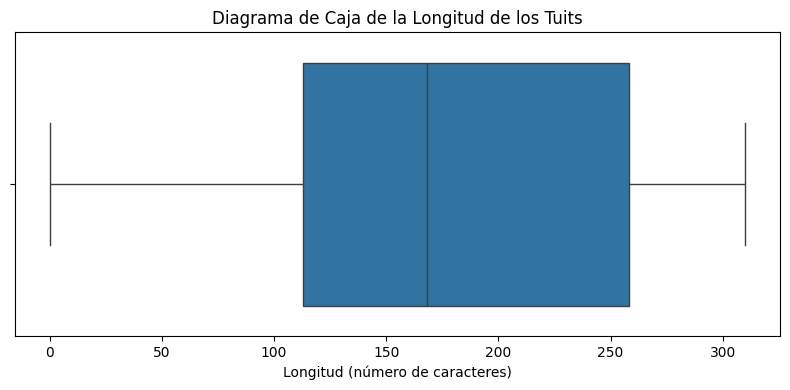

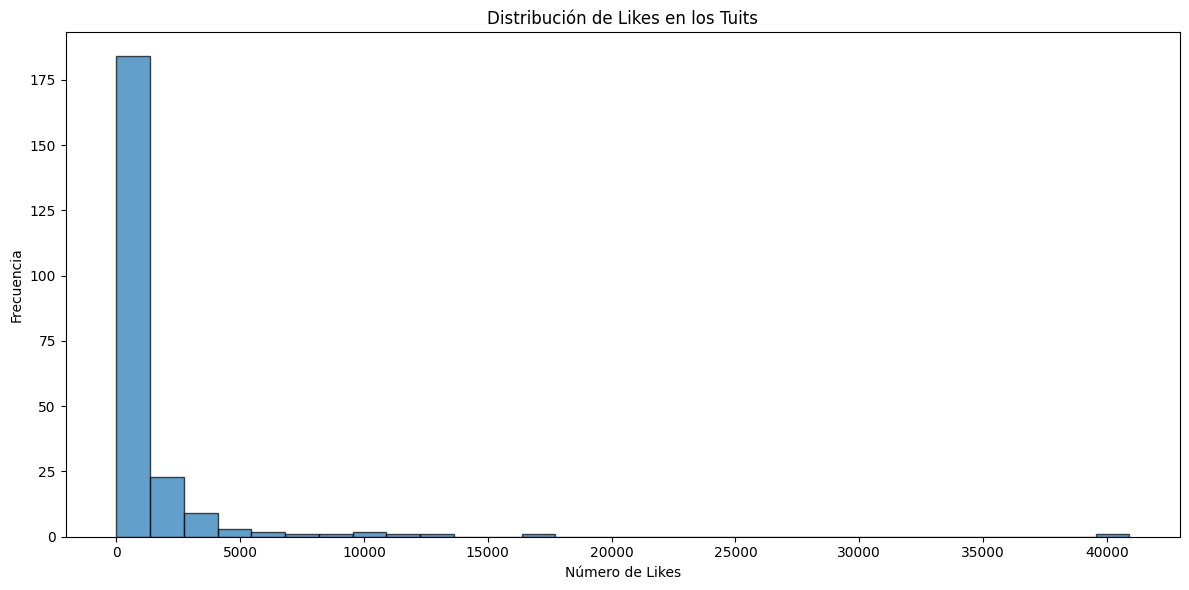

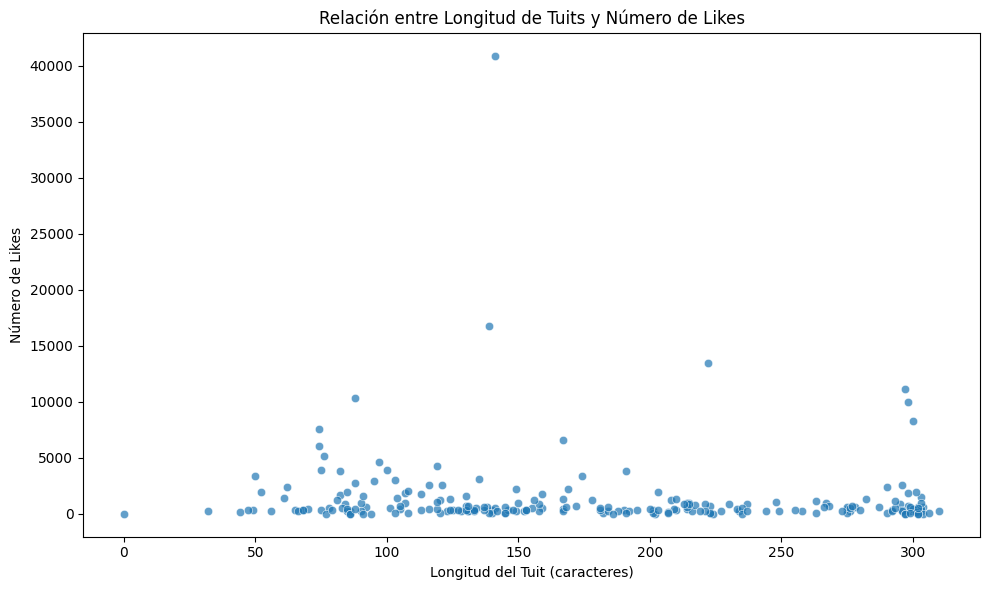

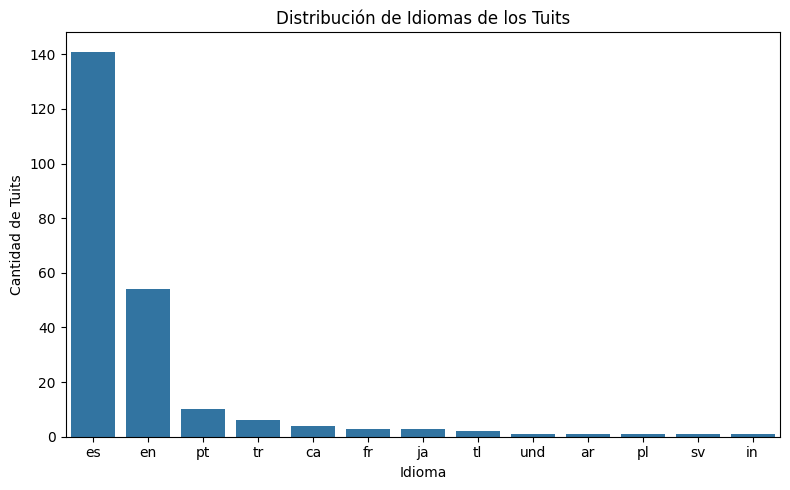

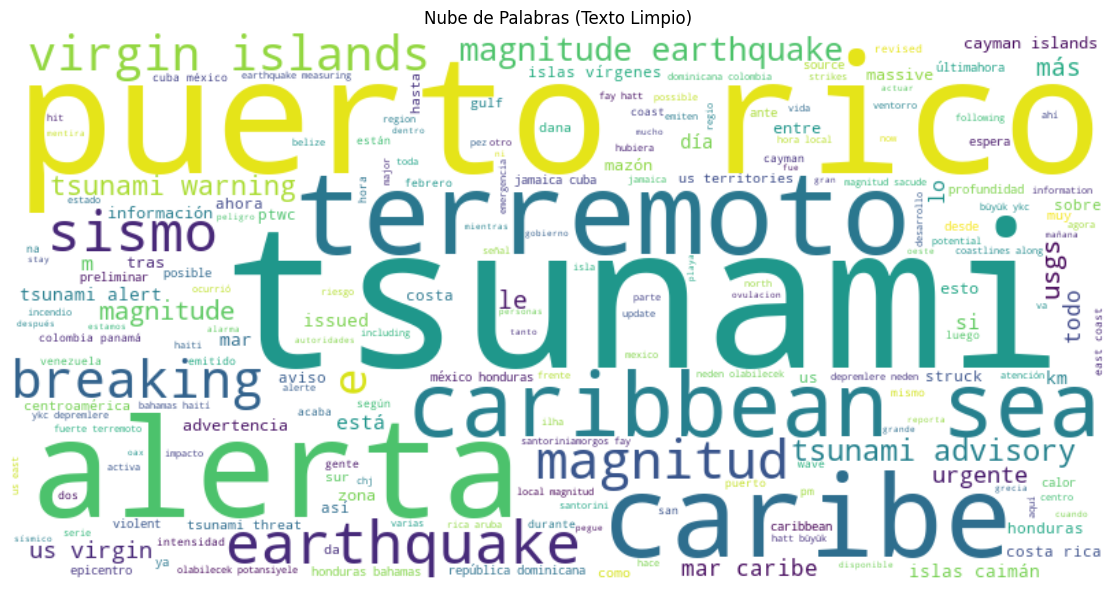

In [3]:
# File: datasets/PR_Advisory_Tweets_Feb_2025/analysis/analyze_Feb2025_tweets.py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Datos cargados exitosamente.")
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

def preprocess_data(df):
    if 'UTC_Time' in df.columns:
        try:
            df['UTC_Time'] = pd.to_datetime(df['UTC_Time'], errors='coerce')
            print("Columna 'UTC_Time' convertida a datetime.")
        except Exception as e:
            print(f"Error al convertir 'UTC_Time': {e}")
    else:
        print("La columna 'UTC_Time' no se encontró.")
    if 'Tweet_Content' in df.columns:
        df['tweet_length'] = df['Tweet_Content'].apply(lambda x: len(x) if isinstance(x, str) else 0)
    else:
        print("La columna 'Tweet_Content' no se encontró para calcular la longitud de los tuits.")
    return df

def plot_engagement_metrics(df):
    interaction_cols = ['Reply_Count', 'Repost_Count', 'Like_Count', 'Bookmark_Count']
    existing_cols = [col for col in interaction_cols if col in df.columns]
    if existing_cols:
        df_interactions = df[existing_cols].melt(var_name="Métrica", value_name="Conteo")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Métrica", y="Conteo", data=df_interactions)
        plt.title("Distribución de Métricas de Interacción")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron columnas de interacción para visualizar.")

def plot_tweet_length_distribution(df):
    if 'tweet_length' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['tweet_length'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df['tweet_length'])
        plt.title("Diagrama de Caja de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'tweet_length' no está disponible para el análisis de longitud.")

def plot_likes_distribution(df):
    if 'Like_Count' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['Like_Count'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de Likes en los Tuits")
        plt.xlabel("Número de Likes")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'Like_Count' no está disponible para analizar la distribución de likes.")

def plot_length_vs_likes(df):
    if 'tweet_length' in df.columns and 'Like_Count' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='tweet_length', y='Like_Count', data=df, alpha=0.7)
        plt.title("Relación entre Longitud de Tuits y Número de Likes")
        plt.xlabel("Longitud del Tuit (caracteres)")
        plt.ylabel("Número de Likes")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron las columnas necesarias ('tweet_length', 'Like_Count') para este análisis.")

def plot_language_distribution(df):
    if 'Language' in df.columns:
        lang_counts = df['Language'].value_counts()
        plt.figure(figsize=(8, 5))
        sns.barplot(x=lang_counts.index, y=lang_counts.values)
        plt.title("Distribución de Idiomas de los Tuits")
        plt.xlabel("Idioma")
        plt.ylabel("Cantidad de Tuits")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'Language' no se encontró para visualizar la distribución de idiomas.")

def generate_word_cloud(df):
    if 'Tweet_Content' not in df.columns:
        print("La columna 'Tweet_Content' no se encontró para generar la nube de palabras.")
        return
    all_text = " ".join(df['Tweet_Content'].dropna().astype(str))
    cleaned_text = re.sub(r'https?://\S+', '', all_text)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    cleaned_text = re.sub(r'\bRT\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^A-Za-záéíóúñüÁÉÍÓÚÑÜ\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()
    spanish_stopwords = {
        "de", "el", "que", "se", "la", "en", "por", "los", "las", "del", "al", 
        "un", "una", "con", "para", "este", "esta", "estos", "estas", "ese", 
        "esa", "esos", "esas", "y", "o", "u", "pero", "su", "sus", "porque",
        "son", "un", "una", "ser", "sido", "ha", "han", "hay", "qué", "etc"
    }
    custom_stopwords = {"https", "http", "co", "amp"}
    all_stopwords = STOPWORDS.union(spanish_stopwords).union(custom_stopwords)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=all_stopwords
    ).generate(cleaned_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras (Texto Limpio)")
    plt.tight_layout()
    plt.show()

def main():
    filepath = "datasets\PR_Advisory_Tweets_Feb_2025\PR_Advisory_Tweets_Feb_2025.csv"
    if not os.path.exists(filepath):
        print(f"El archivo '{filepath}' no existe. Verifica la ruta.")
        return
    df = load_data(filepath)
    if df is None:
        return
    print("Información del dataset:")
    print(df.info())
    print(df.head())
    df = preprocess_data(df)
    plot_engagement_metrics(df)
    plot_tweet_length_distribution(df)
    plot_likes_distribution(df)
    plot_length_vs_likes(df)
    plot_language_distribution(df)
    generate_word_cloud(df)

if __name__ == "__main__":
    main()

## Analysis of Earthquake Tweets (Jan 2020)

The following cell contains the code from `datasets/PR_Earthquake_Tweets_Jan2020/analysis/analyze_Jan2020_tweets.py`.

Datos cargados exitosamente.
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UTC_Time                    296 non-null    object 
 1   Tweet_Content               296 non-null    object 
 2   Post_ID                     296 non-null    float64
 3   Tweet_URL                   296 non-null    object 
 4   Reply_Count                 296 non-null    float64
 5   Repost_Count                296 non-null    float64
 6   Like_Count                  296 non-null    float64
 7   View_Count                  296 non-null    float64
 8   Bookmark_Count              296 non-null    float64
 9   Tweet_Image_URL             178 non-null    object 
 10  Language                    296 non-null    object 
 11  id                          1 non-null      object 
 12  object                      1 non-null

<>:134: SyntaxWarning: invalid escape sequence '\P'
<>:134: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Marco\AppData\Local\Temp\ipykernel_28036\3518864080.py:134: SyntaxWarning: invalid escape sequence '\P'
  filepath = "datasets\PR_Earthquake_Tweets_Jan2020\PR_Earthquake_Tweets_Jan2020.csv"


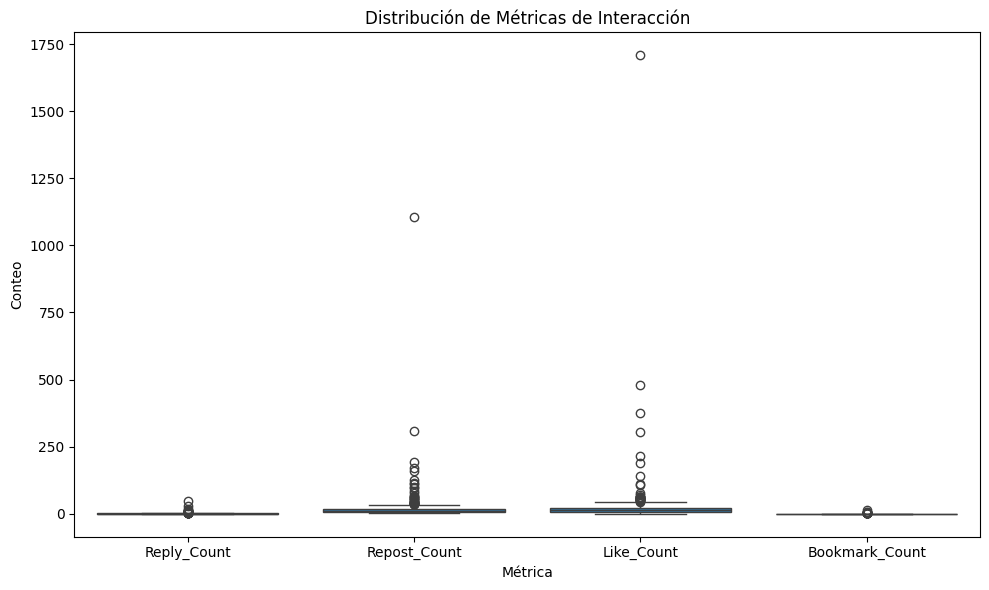

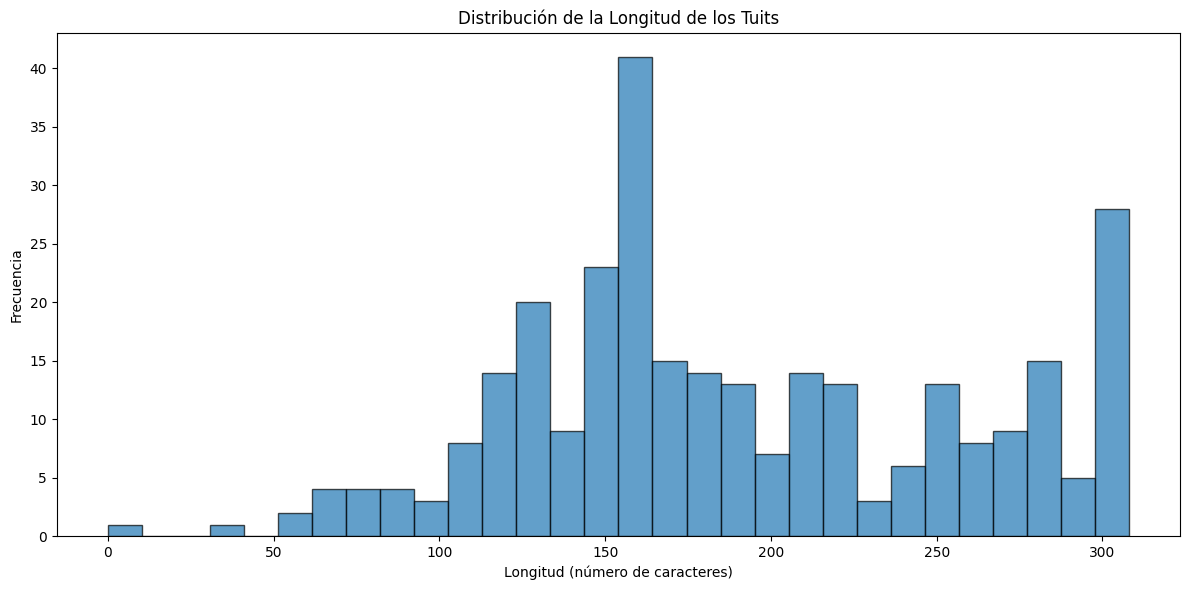

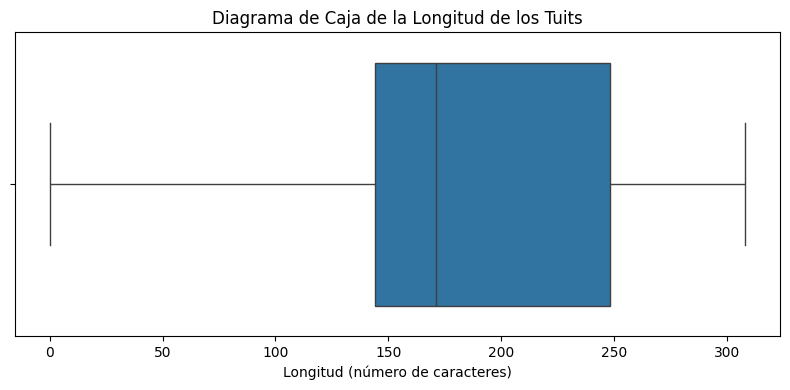

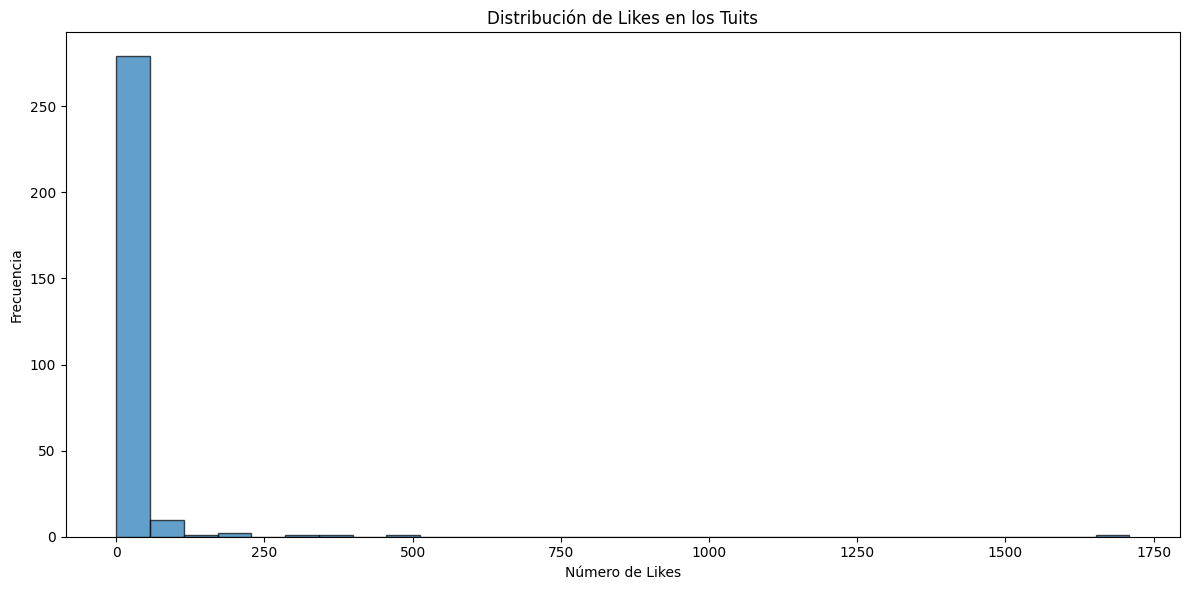

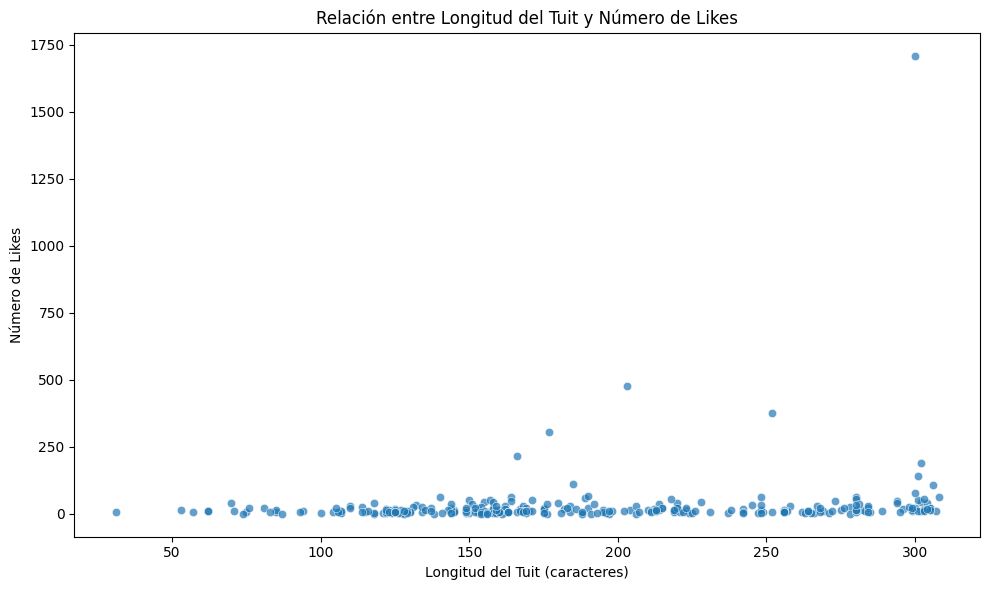

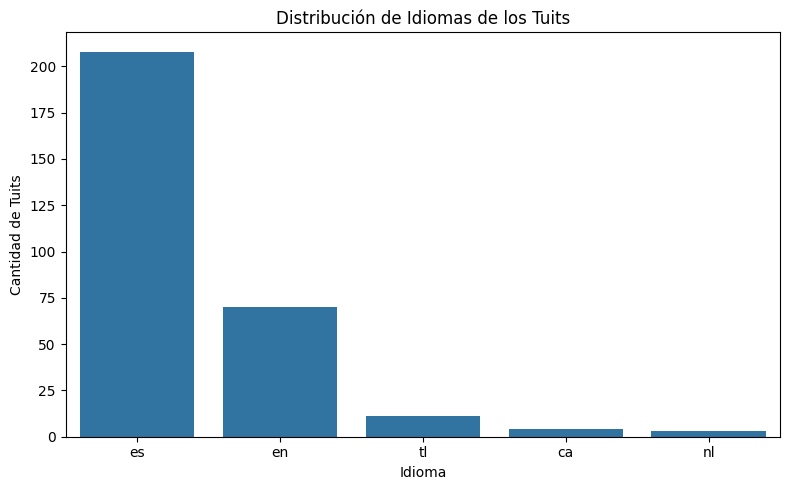

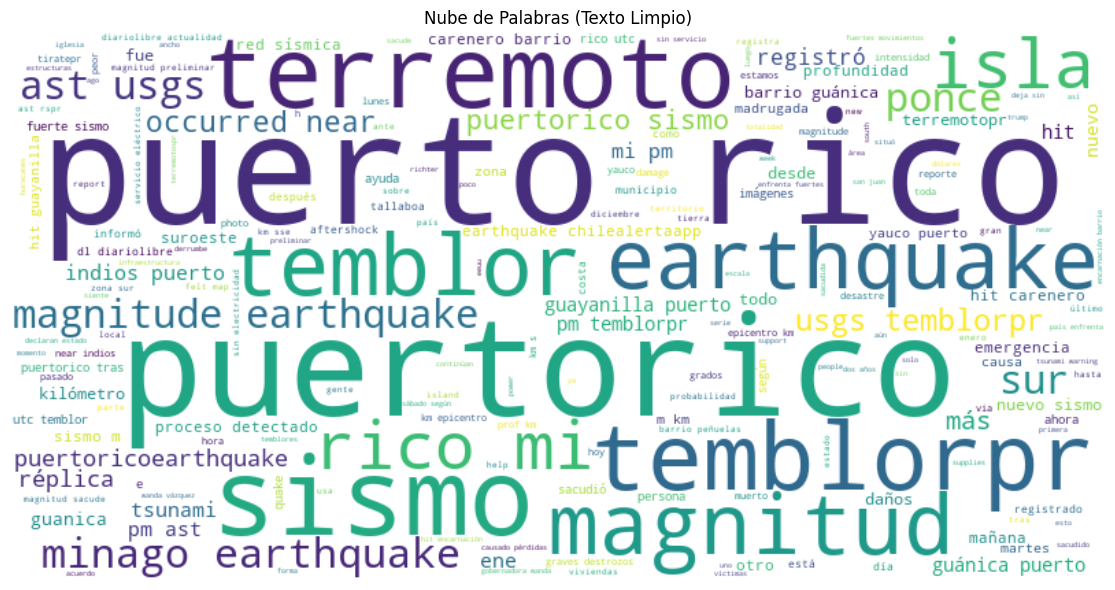

In [4]:
# File: datasets/PR_Earthquake_Tweets_Jan2020/analysis/analyze_Jan2020_tweets.py
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Datos cargados exitosamente.")
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

def preprocess_data(df):
    if 'UTC_Time' in df.columns:
        try:
            df['UTC_Time'] = pd.to_datetime(df['UTC_Time'], errors='coerce')
            print("Columna 'UTC_Time' convertida a datetime.")
        except Exception as e:
            print(f"Error al convertir 'UTC_Time': {e}")
    else:
        print("La columna 'UTC_Time' no se encontró.")
    if 'Tweet_Content' in df.columns:
        df['tweet_length'] = df['Tweet_Content'].apply(lambda x: len(x) if isinstance(x, str) else 0)
    else:
        print("La columna 'Tweet_Content' no se encontró para calcular la longitud del tuit.")
    return df

def plot_interaction_metrics(df):
    interaction_cols = ['Reply_Count', 'Repost_Count', 'Like_Count', 'Bookmark_Count']
    existing_cols = [col for col in interaction_cols if col in df.columns]
    if existing_cols:
        df_interactions = df[existing_cols].melt(var_name="Métrica", value_name="Conteo")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Métrica", y="Conteo", data=df_interactions)
        plt.title("Distribución de Métricas de Interacción")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron columnas de interacción para visualizar.")

def plot_tweet_length_distribution(df):
    if 'tweet_length' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['tweet_length'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df['tweet_length'])
        plt.title("Diagrama de Caja de la Longitud de los Tuits")
        plt.xlabel("Longitud (número de caracteres)")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'tweet_length' no está disponible para analizar la longitud de los tuits.")

def plot_likes_distribution(df):
    if 'Like_Count' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.hist(df['Like_Count'], bins=30, edgecolor='k', alpha=0.7)
        plt.title("Distribución de Likes en los Tuits")
        plt.xlabel("Número de Likes")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'Like_Count' no está disponible para analizar la distribución de likes.")

def plot_length_vs_likes(df):
    if 'tweet_length' in df.columns and 'Like_Count' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='tweet_length', y='Like_Count', data=df, alpha=0.7)
        plt.title("Relación entre Longitud del Tuit y Número de Likes")
        plt.xlabel("Longitud del Tuit (caracteres)")
        plt.ylabel("Número de Likes")
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron las columnas necesarias ('tweet_length', 'Like_Count') para este análisis.")

def plot_language_distribution(df):
    if 'Language' in df.columns:
        lang_counts = df['Language'].value_counts()
        plt.figure(figsize=(8, 5))
        sns.barplot(x=lang_counts.index, y=lang_counts.values)
        plt.title("Distribución de Idiomas de los Tuits")
        plt.xlabel("Idioma")
        plt.ylabel("Cantidad de Tuits")
        plt.tight_layout()
        plt.show()
    else:
        print("La columna 'Language' no se encontró para visualizar la distribución de idiomas.")

def generate_word_cloud(df):
    if 'Tweet_Content' not in df.columns:
        print("La columna 'Tweet_Content' no se encontró para generar la nube de palabras.")
        return
    all_text = " ".join(df['Tweet_Content'].dropna().astype(str))
    cleaned_text = re.sub(r'https?://\S+', '', all_text)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    cleaned_text = re.sub(r'\bRT\b', '', cleaned_text)
    cleaned_text = re.sub(r'[^A-Za-záéíóúñüÁÉÍÓÚÑÜ\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()
    spanish_stopwords = {
        "de", "el", "que", "se", "la", "en", "por", "los", "las", "del", "al", 
        "un", "una", "con", "para", "este", "esta", "estos", "estas", "ese", 
        "esa", "esos", "esas", "y", "o", "u", "pero", "su", "sus", "porque",
        "son", "un", "una", "ser", "sido", "ha", "han", "hay", "qué", "etc"
    }
    custom_stopwords = {"https", "http", "co", "amp"}
    all_stopwords = STOPWORDS.union(spanish_stopwords).union(custom_stopwords)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=all_stopwords
    ).generate(cleaned_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras (Texto Limpio)")
    plt.tight_layout()
    plt.show()

def main():
    filepath = "datasets\PR_Earthquake_Tweets_Jan2020\PR_Earthquake_Tweets_Jan2020.csv"
    if not os.path.exists(filepath):
        print(f"El archivo '{filepath}' no existe. Verifica la ruta.")
        return
    df = load_data(filepath)
    if df is None:
        return
    print("Información del dataset:")
    print(df.info())
    print(df.head())
    df = preprocess_data(df)
    plot_interaction_metrics(df)
    plot_tweet_length_distribution(df)
    plot_likes_distribution(df)
    plot_length_vs_likes(df)
    plot_language_distribution(df)
    generate_word_cloud(df)

if __name__ == "__main__":
    main()